In [72]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

In [4]:
#loading the data
df=pd.read_csv('../input/dummy-advertising-and-sales-data/Dummy Data HSS.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [6]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [34]:
#preprocessing
def preprocessing_inputs(df):
    
    df=df.copy()
    #droping row with missing target data
    missing_target_rows=df[df['Sales'].isna()].index
    df=df.drop(missing_target_rows,axis=0).reset_index(drop=True)
    #filling tv missing values with column mean
    for column in ['TV','Radio','Social Media']:
        df[column]=df[column].fillna(df[column].mean())
    y=df['Sales']
    x=df.drop('Sales',axis=1)
    #spliting the data
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)
    
    
    return x_train,x_test,y_train,y_test

In [35]:
#calling the function
x_train,x_test,y_train,y_test=preprocessing_inputs(df)

In [25]:
x.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [11]:
#checking the number of na 
x.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [16]:
#checking the na  values in the target set
df[df['Sales'].isna()].index

Int64Index([208, 214, 221, 226, 231, 236], dtype='int64')

In [31]:
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4561     94.685866
4562    249.101915
4563    163.631457
4564    253.610411
4565    148.202414
Name: Sales, Length: 4566, dtype: float64

In [43]:
#creating pipeline
nominal_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False))
])



preprocessor=ColumnTransformer(transformers=[
    ('nominal',nominal_transformer,['Influencer'])
],remainder='passthrough')




model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',GradientBoostingRegressor())
])

In [44]:
#fitting the model the training set
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Influencer'])])),
                ('regressor', GradientBoostingRegressor())])

In [46]:
#predicting the test set
y_pred=model.predict(x_test)
y_pred

array([ 92.03833557,  93.05698904,  79.04823134, ..., 342.8801233 ,
       153.29348362, 120.24411602])

In [55]:
#evaluating the error
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
rmse

6.329216605086188

In [53]:
y_test.describe()

count    1370.000000
mean      194.348001
std        92.698049
min        31.402262
25%       112.821691
50%       193.754820
75%       272.015837
max       358.420739
Name: Sales, dtype: float64

In [69]:
#calculting the accurary
r2=1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-y_test.mean())**2))

In [64]:
np.sum((y_test-y_pred)**2)

54880.8064827153

In [70]:
#printing the accurary and error values
print('RMSE {:2f}'.format(rmse))
print('R*2: {:4f}'.format(r2))

RMSE 6.329217
R*2: 0.995335


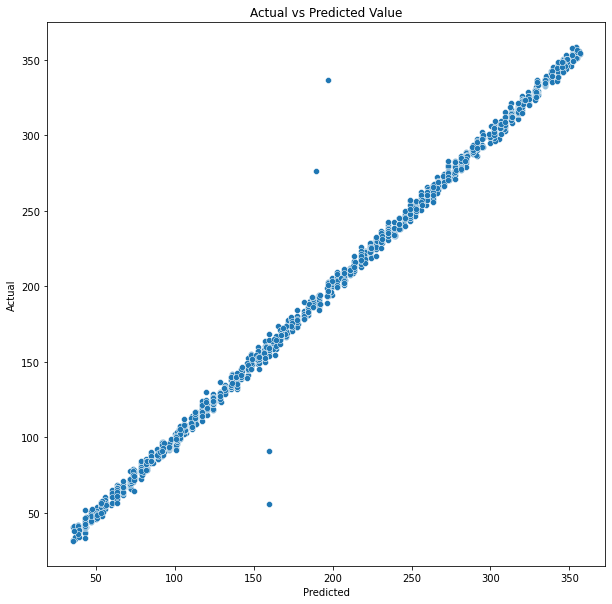

In [75]:
#plotting the graph between predicted value vs actual value
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Value')
plt.show()